# Práctica 1: Perceptrón multicapa.

Tu jefe pidió a RH que recolectara datos de desempeño de tus compañeros, los resultados se almacenaron en un csv. El punto critico de estos datos es la satisfacción del empleado, entonces ¿Podremos estimar la satisfacción de los empleados con los datos recabados?.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models


df = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

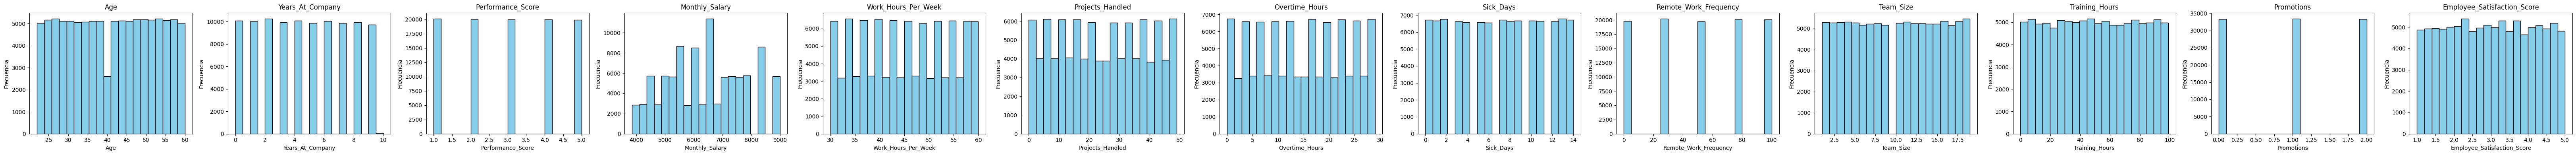

In [2]:
# Filtrar las columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).drop('Employee_ID',axis=1)


# Si numeric_columns es un Index, conviértelo a lista
cols = list(numeric_columns)

fig, axes = plt.subplots(1, len(cols), figsize=(5 * len(cols), 4))

for i, col in enumerate(cols):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Problemas**, tenemos distribuciones con picos, esos nos indica categorías. Por otro lado, tenemos variables con "valles" en su distribución (distribuciones multimodales) por lo que resultaría óptimo aplicar técnicas de feature engeneering. Por último tenemos distribuciones uniformes, por lo que cada una requeriría un procesamiento indivudual, hagamos la vista gorda e intentemos ajustar un MLP con estos datos, solo estandaricemos nuestros datos.

---

## Implementación de Red:

To**memos los datos numéricos como nuestra variable X, y la variable objetivo como ***'Employee_Satisfaction_Score'***.
- **Actividad 1**: Para todos los strings ``'@modif@'`` que aparescan en el siguiente bloque de código cámbialos para que el código funcione.

In [3]:
X = numeric_columns.drop('Employee_Satisfaction_Score',axis = 1)
y = numeric_columns.Employee_Satisfaction_Score
y = y.apply(lambda x: round(x)-1) #Cambiamos la variable objetivo a 5 categorías numéricas

scaler = StandardScaler()
X_standar = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standar, y, test_size=0.33, random_state=42)

y_onehot_train = tf.keras.utils.to_categorical(y_train, 5)
y_onehot_test = tf.keras.utils.to_categorical(y_test,5)

- **Actividad 2:** Implementa 3 arquitecturas de MLP, cada una con su propio nombre, cambiando la estructura de dichas arquitecturas (capas, neuronas por capa, función de activación, etc). 

In [4]:
print(y)

0        2
1        1
2        2
3        1
4        0
        ..
99995    0
99996    2
99997    2
99998    2
99999    2
Name: Employee_Satisfaction_Score, Length: 100000, dtype: int64


In [5]:
print(f"Datos cargados y entrenados {X_train}")

Datos cargados y entrenados [[ 7.08870893e-01  5.31111576e-01  1.41693889e+00 ... -3.66409755e-01
  -1.21357944e-01 -1.22534589e+00]
 [ 1.33142158e+00 -1.21146051e+00 -7.03623958e-01 ... -5.48380869e-01
   9.86282602e-01 -1.22534589e+00]
 [-1.42558859e+00 -1.55997493e+00 -7.03623958e-01 ...  5.43445812e-01
  -5.36723149e-01  1.22603228e+00]
 ...
 [-1.80487226e-01  8.79625993e-01  3.23032407e-03 ...  1.63527249e+00
   6.74758699e-01 -1.22534589e+00]
 [ 1.59822901e+00  1.22814041e+00 -1.41047824e+00 ... -7.30351982e-01
  -1.09054342e+00 -1.22534589e+00]
 [-4.47294662e-01 -1.55997493e+00  3.23032407e-03 ...  1.79503585e-01
   3.28621028e-01  3.43192945e-04]]


In [6]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Dense(128, activation='relu',input_shape=(X_train.shape[1],)),

    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(32, activation ='relu'),

    tf.keras.layers.Dense(5, activation='linear')
])


In [7]:
modelo1 = tf.keras.Sequential([

    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),

    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(5, activation='sigmoid')

])

In [8]:
modelo2 = tf.keras.Sequential([

    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),

    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(5, activation='softmax')
])

- **Actividad 3:** Compila y ajusta tus tres modelos con sus respectivos hiperparámetros.

In [9]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='mse',
    metrics=['mae']
)

In [10]:
history = modelo.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.7069 - mae: 1.3394 - val_loss: 1.5694 - val_mae: 1.0571
Epoch 2/50
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6223 - mae: 1.0699 - val_loss: 1.5473 - val_mae: 1.0492
Epoch 3/50
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5989 - mae: 1.0633 - val_loss: 1.5374 - val_mae: 1.0453
Epoch 4/50
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5827 - mae: 1.0584 - val_loss: 1.5300 - val_mae: 1.0421
Epoch 5/50
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5770 - mae: 1.0567 - val_loss: 1.5271 - val_mae: 1.0404
Epoch 6/50
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5629 - mae: 1.0513 - val_loss: 1.5223 - val_mae: 1.0378
Epoch 7/50
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5572 - mae: 1.0496 - val_loss: 1.5226 - val_mae: 1.0374
Epoch 8/50
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.5477 - mae: 1.0457 - val_loss: 1.5140 - val_mae: 1.0336
Epoch 9/50
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

In [11]:
modelo1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()]
)

In [12]:
history1 = modelo1.fit(
    X_train,
    y_onehot_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - auc: 0.5409 - binary_accuracy: 0.7613 - loss: 0.5430 - val_auc: 0.5982 - val_binary_accuracy: 0.8000 - val_loss: 0.4911
Epoch 2/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.5926 - binary_accuracy: 0.8000 - loss: 0.4942 - val_auc: 0.5990 - val_binary_accuracy: 0.8000 - val_loss: 0.4900
Epoch 3/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.5945 - binary_accuracy: 0.8000 - loss: 0.4931 - val_auc: 0.5995 - val_binary_accuracy: 0.8000 - val_loss: 0.4895
Epoch 4/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.5963 - binary_accuracy: 0.8000 - loss: 0.4921 - val_auc: 0.5991 - val_binary_accuracy: 0.8000 - val_loss: 0.4893
Epoch 5/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.5973 - binary_accuracy: 0.8000 - loss: 0.4915 - val_auc: 0.5985 - val_binary_accuracy: 0.8000 - val_loss: 0.4891
Epoch 6/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.5993 - binary_accuracy: 0.8000 - loss: 0.4909 - val_auc: 0.5981 - val

In [13]:
modelo2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor ='val_accuracy', patience=10, restore_best_weights=True
)

In [15]:
history2 = modelo2.fit(
    X_train,
    y_onehot_train,
    epochs=100,
    batch_size=128,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2550 - loss: 1.5621 - val_accuracy: 0.2488 - val_loss: 1.5571
Epoch 2/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2609 - loss: 1.5564 - val_accuracy: 0.2452 - val_loss: 1.5568
Epoch 3/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2605 - loss: 1.5551 - val_accuracy: 0.2509 - val_loss: 1.5561
Epoch 4/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2661 - loss: 1.5542 - val_accuracy: 0.2504 - val_loss: 1.5576
Epoch 5/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2668 - loss: 1.5539 - val_accuracy: 0.2494 - val_loss: 1.5569
Epoch 6/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2648 - loss: 1.5529 - val_accuracy: 0.2564 - val_loss: 1.5562
Epoch 7/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2682 - loss: 1.5523 - val_accuracy: 0.2522 - val_loss: 1.5576
Epoch 8/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2711 - loss: 1.5514 - val_accu

- **Actividad 4:** Sube tus cambios al repositorio, envía el link de tu repositorio a la actividad 2 de tu checkpoint 2 y contesta las preguntas de dicha actividad.